In [266]:
import pandas as pd

In [267]:
hof = pd.read_csv('C:\\Users\\Shlomit\\Desktop\\NBA-Hall-Of-Fame-Project\\hall-of-fame-DF.csv')
hof

,PLAYER_NAME,GP,GS,MIN,FG,3P,FT,REB,AST,STL,...,S.T,T.T,F.T.D,S.T.D,Seasons,Playoffs,Finals,titles,Retired,H.O.F
0,Alaa Abdelnaby,256,53,12.5,50.2,0.0,70.1,3.3,0.3,0.3,...,NaN,NaN,NaN,NaN,5.0,3.0,1.0,0.0,1.0,0.0
1,Zaid Abdul-Aziz,505,0,21.8,42.8,--,72.8,8.0,1.2,0.6,...,NaN,NaN,NaN,NaN,10.0,3.0,0.0,0.0,1.0,0.0
2,Kareem Abdul-Jabbar,1560,625,36.8,55.9,5.6,72.1,11.2,3.6,0.9,...,5.0,0.0,5.0,6.0,20.0,18.0,10.0,6.0,1.0,1.0
3,Mahmoud Abdul-Rauf,586,336,26.7,44.2,35.4,90.5,1.9,3.5,0.8,...,NaN,NaN,NaN,NaN,9.0,2.0,0.0,0.0,1.0,0.0
4,Tariq Abdul-Wahad,236,145,20.4,41.7,23.7,70.3,3.3,1.1,0.8,...,NaN,NaN,NaN,NaN,6.0,2.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4700,Ante Zizic,113,27,13.4,58.1,0.0,71.1,3.9,0.6,0.2,...,NaN,NaN,NaN,NaN,3.0,1.0,1.0,0.0,0.0,0.0
4701,Jim Zoet,7,0,4.3,20.0,0.0,0.0,1.1,0.1,0.1,...,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,1.0,0.0
4702,Bill Zopf,53,0,7.5,36.3,--,55.6,0.9,1.4,--,...,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,1.0,0.0
4703,Ivica Zubac,336,203,18.6,59.7,10.0,75.6,6.3,1.1,0.3,...,NaN,NaN,NaN,NaN,5.0,3.0,0.0,0.0,0.0,0.0


In [268]:
hof.columns

Index(['PLAYER_NAME', 'GP', 'GS', 'MIN', 'FG', '3P', 'FT', 'REB', 'AST', 'STL',
       'TO', 'BLK', 'PF', 'PTS', 'EFF', 'A.S.G', 'P.O.M', 'F.T', 'S.T', 'T.T',
       'F.T.D', 'S.T.D', 'Seasons', 'Playoffs', 'Finals', 'titles', 'Retired',
       'H.O.F'],
      dtype='object')

In [269]:
hof.sample(5)

,PLAYER_NAME,GP,GS,MIN,FG,3P,FT,REB,AST,STL,...,S.T,T.T,F.T.D,S.T.D,Seasons,Playoffs,Finals,titles,Retired,H.O.F
3083,Jeff Nordgaard,13,0,3.7,27.8,0.0,88.9,1.1,0.2,0.2,...,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,1.0,0.0
2855,Eddie Miller,142,0,25.9,37.4,--,69.2,8.5,1.5,--,...,NaN,NaN,NaN,NaN,2.0,1.0,0.0,0.0,1.0,0.0
1269,Terrance Ferguson,204,124,19.6,40.4,33.4,75.3,1.3,0.7,0.5,...,NaN,NaN,NaN,NaN,4.0,3.0,0.0,0.0,0.0,0.0
2254,Larry Kenon,503,37,30.8,48.9,10.0,79.8,7.8,2.6,1.3,...,NaN,NaN,NaN,NaN,7.0,5.0,0.0,0.0,1.0,0.0
1374,Todd Fuller,225,23,11.1,42.2,0.0,66.8,3.0,0.2,0.2,...,NaN,NaN,NaN,NaN,5.0,1.0,0.0,0.0,1.0,0.0


In [270]:
hof[(hof.PTS>12)]

,PLAYER_NAME,GP,GS,MIN,FG,3P,FT,REB,AST,STL,...,S.T,T.T,F.T.D,S.T.D,Seasons,Playoffs,Finals,titles,Retired,H.O.F
2,Kareem Abdul-Jabbar,1560,625,36.8,55.9,5.6,72.1,11.2,3.6,0.9,...,5.0,0.0,5.0,6.0,20.0,18.0,10.0,6.0,1.0,1.0
3,Mahmoud Abdul-Rauf,586,336,26.7,44.2,35.4,90.5,1.9,3.5,0.8,...,NaN,NaN,NaN,NaN,9.0,2.0,0.0,0.0,1.0,0.0
5,Shareef Abdur-Rahim,830,704,34.8,47.2,29.7,81.0,7.5,2.5,1.0,...,NaN,NaN,NaN,NaN,12.0,1.0,0.0,0.0,1.0,0.0
16,Alvan Adams,988,342,27.5,49.8,13.3,78.8,7.0,4.1,1.3,...,NaN,NaN,NaN,NaN,13.0,9.0,1.0,0.0,1.0,0.0
21,Michael Adams,653,510,31.3,41.5,33.2,84.9,2.9,6.4,1.7,...,NaN,NaN,NaN,NaN,11.0,5.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4644,James Worthy,926,717,32.4,52.1,24.1,76.9,5.1,3.0,1.1,...,0.0,2.0,NaN,NaN,12.0,9.0,6.0,3.0,1.0,1.0
4667,George Yardley,472,0,33.4,42.2,--,78.0,8.9,1.7,--,...,1.0,0.0,NaN,NaN,7.0,7.0,2.0,0.0,1.0,1.0
4680,Thaddeus Young,1059,711,29.6,50.2,33.0,66.5,5.9,1.8,1.4,...,NaN,NaN,NaN,NaN,14.0,8.0,0.0,0.0,0.0,0.0
4682,Trae Young,255,255,33.4,43.6,35.0,86.8,3.9,9.0,0.9,...,NaN,NaN,NaN,NaN,3.0,1.0,0.0,0.0,0.0,0.0


In [113]:
hof.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4705 entries, 0 to 4704
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PLAYER_NAME  4705 non-null   object 
 1   TEAM         0 non-null      float64
 2   GP           4705 non-null   int64  
 3   GS           4705 non-null   int64  
 4   MIN          4705 non-null   object 
 5   FG           4705 non-null   float64
 6   3P           4705 non-null   object 
 7   FT           4705 non-null   float64
 8   REB          4705 non-null   object 
 9   AST          4705 non-null   float64
 10  STL          4705 non-null   object 
 11  TO           4705 non-null   object 
 12  BLK          4705 non-null   object 
 13  PF           4705 non-null   float64
 14  PTS          4705 non-null   float64
 15  EFF          4705 non-null   float64
 16  A.S.G        445 non-null    float64
 17  P.O.M        114 non-null    float64
 18  F.T          250 non-null    float64
 19  S.T   

In [271]:
hof.describe(include='all')

,PLAYER_NAME,GP,GS,MIN,FG,3P,FT,REB,AST,STL,...,S.T,T.T,F.T.D,S.T.D,Seasons,Playoffs,Finals,titles,Retired,H.O.F
count,4705,4705.000000,4705.000000,4705,4705.000000,4705,4705.000000,4705,4705.000000,4705,...,250.000000,250.000000,168.000000,168.000000,4534.000000,4534.000000,4534.000000,4534.000000,4534.000000,4705.000000
unique,4671,NaN,NaN,376,NaN,346,NaN,136,NaN,27,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Charles Jones,NaN,NaN,--,NaN,--,NaN,--,NaN,--,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,3,NaN,NaN,344,NaN,1285,NaN,292,NaN,981,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,271.541126,97.312434,NaN,40.555388,NaN,66.504740,NaN,1.411222,NaN,...,1.504000,0.660000,1.666667,1.636905,4.990957,2.329069,0.384429,0.193648,0.766211,0.030181
std,NaN,311.737240,205.710440,NaN,11.431701,NaN,20.501301,NaN,1.365610,NaN,...,1.492277,0.986047,2.315443,1.310600,4.415159,3.166845,1.016621,0.694115,0.423286,0.171102
min,NaN,1.000000,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,31.000000,0.000000,NaN,36.300000,NaN,61.500000,NaN,0.500000,NaN,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,NaN,127.000000,1.000000,NaN,42.200000,NaN,71.200000,NaN,1.000000,NaN,...,1.000000,0.000000,1.000000,1.000000,3.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,NaN,454.000000,76.000000,NaN,46.500000,NaN,78.200000,NaN,1.900000,NaN,...,2.000000,1.000000,2.000000,2.000000,8.000000,3.000000,0.000000,0.000000,1.000000,0.000000


In [272]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'count hall of fame memebership or not')

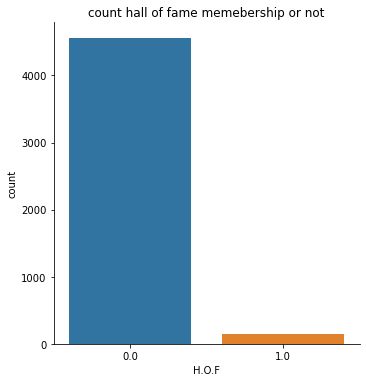

In [273]:
sns.catplot(x="H.O.F",data=hof,kind="count")
plt.title('count hall of fame memebership or not')

In [274]:
hof=hof.rename({'A.S.G':'ASG','P.O.M':'POM','F.T':'T1','S.T':'T2','T.T':'T3','F.T.D':'DT1',
'S.T.D':'DT2','titles':'Titles', 'H.O.F':'HOF'},axis=1)
hof.columns

Index(['PLAYER_NAME', 'GP', 'GS', 'MIN', 'FG', '3P', 'FT', 'REB', 'AST', 'STL',
       'TO', 'BLK', 'PF', 'PTS', 'EFF', 'ASG', 'POM', 'T1', 'T2', 'T3', 'DT1',
       'DT2', 'Seasons', 'Playoffs', 'Finals', 'Titles', 'Retired', 'HOF'],
      dtype='object')

In [275]:
hof.HOF.sum()

142.0

In [276]:
hof[(hof.Finals>7) ]

,PLAYER_NAME,GP,GS,MIN,FG,3P,FT,REB,AST,STL,...,T2,T3,DT1,DT2,Seasons,Playoffs,Finals,Titles,Retired,HOF
2,Kareem Abdul-Jabbar,1560,625,36.8,55.9,5.6,72.1,11.2,3.6,0.9,...,5.0,0.0,5.0,6.0,20.0,18.0,10.0,6.0,1.0,1.0
262,Elgin Baylor,846,0,40.0,43.1,--,78.0,13.5,4.3,--,...,0.0,0.0,NaN,NaN,14.0,12.0,8.0,0.0,1.0,1.0
827,Michael Cooper,873,94,27.1,46.9,34.0,83.3,3.2,4.2,1.2,...,NaN,NaN,5.0,3.0,12.0,11.0,8.0,5.0,1.0,0.0
1290,Derek Fisher,1287,731,25.4,39.9,37.4,81.7,2.1,3.0,1.1,...,NaN,NaN,NaN,NaN,18.0,16.0,8.0,5.0,1.0,0.0
1744,John Havlicek,1270,0,36.6,43.9,--,81.5,6.3,4.8,1.2,...,7.0,0.0,5.0,3.0,16.0,13.0,8.0,8.0,1.0,1.0
1775,Tom Heinsohn,654,0,29.4,40.5,--,79.0,8.8,2.0,--,...,4.0,0.0,NaN,NaN,9.0,9.0,9.0,8.0,1.0,1.0
2025,LeBron James,1350,1349,38.2,50.4,34.5,73.4,7.5,7.4,1.6,...,3.0,1.0,5.0,1.0,18.0,15.0,10.0,4.0,0.0,0.0
2113,Magic Johnson,906,763,36.7,52.0,30.3,84.8,7.2,11.2,1.9,...,1.0,0.0,NaN,NaN,13.0,13.0,9.0,5.0,1.0,1.0
2171,K.C. Jones,676,0,25.9,38.7,--,64.7,3.5,4.3,--,...,NaN,NaN,NaN,NaN,9.0,9.0,8.0,8.0,1.0,1.0
2184,Sam Jones,871,0,27.9,45.6,--,80.3,4.9,2.5,--,...,3.0,0.0,NaN,NaN,12.0,12.0,11.0,10.0,1.0,1.0


In [277]:
hof[(hof.Retired>0) ]

,PLAYER_NAME,GP,GS,MIN,FG,3P,FT,REB,AST,STL,...,T2,T3,DT1,DT2,Seasons,Playoffs,Finals,Titles,Retired,HOF
0,Alaa Abdelnaby,256,53,12.5,50.2,0.0,70.1,3.3,0.3,0.3,...,NaN,NaN,NaN,NaN,5.0,3.0,1.0,0.0,1.0,0.0
1,Zaid Abdul-Aziz,505,0,21.8,42.8,--,72.8,8.0,1.2,0.6,...,NaN,NaN,NaN,NaN,10.0,3.0,0.0,0.0,1.0,0.0
2,Kareem Abdul-Jabbar,1560,625,36.8,55.9,5.6,72.1,11.2,3.6,0.9,...,5.0,0.0,5.0,6.0,20.0,18.0,10.0,6.0,1.0,1.0
3,Mahmoud Abdul-Rauf,586,336,26.7,44.2,35.4,90.5,1.9,3.5,0.8,...,NaN,NaN,NaN,NaN,9.0,2.0,0.0,0.0,1.0,0.0
4,Tariq Abdul-Wahad,236,145,20.4,41.7,23.7,70.3,3.3,1.1,0.8,...,NaN,NaN,NaN,NaN,6.0,2.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4696,Jiri Zidek,135,23,9.8,40.8,25.0,78.3,2.1,0.2,0.1,...,NaN,NaN,NaN,NaN,3.0,0.0,0.0,0.0,1.0,0.0
4697,Derrick Zimmerman,2,0,16.0,66.7,0.0,0.0,2.0,3.5,0.0,...,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,1.0,0.0
4701,Jim Zoet,7,0,4.3,20.0,0.0,0.0,1.1,0.1,0.1,...,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,1.0,0.0
4702,Bill Zopf,53,0,7.5,36.3,--,55.6,0.9,1.4,--,...,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,1.0,0.0


In [278]:
hof = hof[hof['Retired'] == 1]
hof

,PLAYER_NAME,GP,GS,MIN,FG,3P,FT,REB,AST,STL,...,T2,T3,DT1,DT2,Seasons,Playoffs,Finals,Titles,Retired,HOF
0,Alaa Abdelnaby,256,53,12.5,50.2,0.0,70.1,3.3,0.3,0.3,...,NaN,NaN,NaN,NaN,5.0,3.0,1.0,0.0,1.0,0.0
1,Zaid Abdul-Aziz,505,0,21.8,42.8,--,72.8,8.0,1.2,0.6,...,NaN,NaN,NaN,NaN,10.0,3.0,0.0,0.0,1.0,0.0
2,Kareem Abdul-Jabbar,1560,625,36.8,55.9,5.6,72.1,11.2,3.6,0.9,...,5.0,0.0,5.0,6.0,20.0,18.0,10.0,6.0,1.0,1.0
3,Mahmoud Abdul-Rauf,586,336,26.7,44.2,35.4,90.5,1.9,3.5,0.8,...,NaN,NaN,NaN,NaN,9.0,2.0,0.0,0.0,1.0,0.0
4,Tariq Abdul-Wahad,236,145,20.4,41.7,23.7,70.3,3.3,1.1,0.8,...,NaN,NaN,NaN,NaN,6.0,2.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4696,Jiri Zidek,135,23,9.8,40.8,25.0,78.3,2.1,0.2,0.1,...,NaN,NaN,NaN,NaN,3.0,0.0,0.0,0.0,1.0,0.0
4697,Derrick Zimmerman,2,0,16.0,66.7,0.0,0.0,2.0,3.5,0.0,...,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,1.0,0.0
4701,Jim Zoet,7,0,4.3,20.0,0.0,0.0,1.1,0.1,0.1,...,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,1.0,0.0
4702,Bill Zopf,53,0,7.5,36.3,--,55.6,0.9,1.4,--,...,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,1.0,0.0


In [279]:
data_with_index = hof.set_index("PLAYER_NAME")
data_with_index = data_with_index.drop(['Dirk Nowitzki','Dwyane Wade','Vince Carter','Pau Gasol','Tony Parker',"Amar'e Stoudemire",'Manu Ginóbili'])


In [280]:
hof=data_with_index
hof

,GP,GS,MIN,FG,3P,FT,REB,AST,STL,TO,...,T2,T3,DT1,DT2,Seasons,Playoffs,Finals,Titles,Retired,HOF
PLAYER_NAME,,,,,,,,,,,,,,,,,,,,,
Alaa Abdelnaby,256,53,12.5,50.2,0.0,70.1,3.3,0.3,0.3,1.0,...,NaN,NaN,NaN,NaN,5.0,3.0,1.0,0.0,1.0,0.0
Zaid Abdul-Aziz,505,0,21.8,42.8,--,72.8,8.0,1.2,0.6,0.9,...,NaN,NaN,NaN,NaN,10.0,3.0,0.0,0.0,1.0,0.0
Kareem Abdul-Jabbar,1560,625,36.8,55.9,5.6,72.1,11.2,3.6,0.9,2.7,...,5.0,0.0,5.0,6.0,20.0,18.0,10.0,6.0,1.0,1.0
Mahmoud Abdul-Rauf,586,336,26.7,44.2,35.4,90.5,1.9,3.5,0.8,1.6,...,NaN,NaN,NaN,NaN,9.0,2.0,0.0,0.0,1.0,0.0
Tariq Abdul-Wahad,236,145,20.4,41.7,23.7,70.3,3.3,1.1,0.8,1.3,...,NaN,NaN,NaN,NaN,6.0,2.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Jiri Zidek,135,23,9.8,40.8,25.0,78.3,2.1,0.2,0.1,0.5,...,NaN,NaN,NaN,NaN,3.0,0.0,0.0,0.0,1.0,0.0
Derrick Zimmerman,2,0,16.0,66.7,0.0,0.0,2.0,3.5,0.0,2.0,...,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,1.0,0.0
Jim Zoet,7,0,4.3,20.0,0.0,0.0,1.1,0.1,0.1,0.6,...,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,1.0,0.0


Index(['TEAM', 'GP', 'GS', 'MIN', 'FG', '3P', 'FT', 'REB', 'AST', 'STL', 'TO',
       'BLK', 'PF', 'PTS', 'EFF', 'ASG', 'POM', 'Team_1', 'Team_2', 'Team_3',
       'Defensive_Team_1', 'Defensive_Team_2', 'Seasons', 'Playoffs', 'Finals',
       'titles', 'Retired', 'HOF'],
      dtype='object')

Text(0.5, 1.0, 'Data separate by Hall of fame memebership or not')

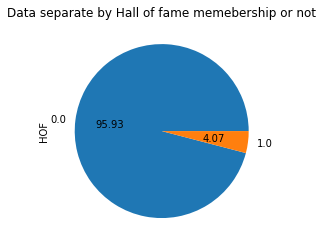

In [281]:
hof["HOF"].value_counts().plot(kind = "pie", autopct = "%.2f" )

plt.title('Data separate by Hall of fame memebership or not')